Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [28]:
# NMSG = 100_000
# ITERATIONS = 20
# # Load Scala benchmark data
# scala_idle_raw_data = pd.read_csv('../data/ping_pong/1/ping_pong_akka_actor_benchmark_idle_power.csv')
# scala_bench_raw_data = pd.read_csv('../data/ping_pong/1/ping_pong_akka_actor_benchmark_power_metrics.csv')

# # Load Erlang benchmark data
# erlang_idle_raw_data = pd.read_csv('../data/ping_pong/1/ping_pong_benchmark_idle_power.csv')
# erlang_bench_raw_data = pd.read_csv('../data/ping_pong/1/ping_pong_benchmark_power_metrics.csv')

# NMSG = 1_000_000
# ITERATIONS = 10
# # Load Scala benchmark data
# scala_idle_raw_data = pd.read_csv('../data/ping_pong/2/ping_pong_akka_actor_benchmark_idle_power.csv')
# scala_bench_raw_data = pd.read_csv('../data/ping_pong/2/ping_pong_akka_actor_benchmark_power_metrics.csv')

# # Load Erlang benchmark data
# erlang_idle_raw_data = pd.read_csv('../data/ping_pong/2/ping_pong_benchmark_idle_power.csv')
# erlang_bench_raw_data = pd.read_csv('../data/ping_pong/2/ping_pong_benchmark_power_metrics.csv')

NMSG = 10_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv('../data/ping_pong/3/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv('../data/ping_pong/3/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv('../data/ping_pong/3/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv('../data/ping_pong/3/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

In [29]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

Preview the Data

In [30]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 12 17:14:46 2025 +0100) (1007.67ms el...,5.30,0.0692,0.850,7.92,0.78,47.16,63.64 C,Nominal
1,(Wed Mar 12 17:14:47 2025 +0100) (1005.33ms el...,6.89,0.1020,1.170,9.66,1.41,66.90,63.33 C,Nominal
2,(Wed Mar 12 17:14:48 2025 +0100) (1005.10ms el...,1.95,0.0818,0.937,4.60,0.97,50.39,62.92 C,Nominal
3,(Wed Mar 12 17:14:49 2025 +0100) (1008.58ms el...,5.30,0.1940,1.100,8.08,1.16,49.42,62.64 C,Nominal
4,(Wed Mar 12 17:14:50 2025 +0100) (1008.24ms el...,1.71,0.0485,0.757,4.14,0.55,34.02,62.47 C,Nominal


In [6]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(27, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 13 07:09:40 2025 +0100) (108.90ms ela...,29.7,0.0000,1.010,31.98,3.37,96.97,58.90 C,Nominal
1,(Thu Mar 13 07:09:40 2025 +0100) (104.56ms ela...,39.9,0.0887,1.530,42.86,3.96,99.14,58.90 C,Nominal
2,(Thu Mar 13 07:09:41 2025 +0100) (104.68ms ela...,37.7,0.2650,2.010,41.31,3.96,99.17,58.90 C,Nominal
3,(Thu Mar 13 07:09:41 2025 +0100) (104.21ms ela...,32.5,0.0996,0.819,36.95,4.00,100.01,58.90 C,Nominal
4,(Thu Mar 13 07:09:41 2025 +0100) (104.46ms ela...,40.1,0.2220,0.989,45.09,4.00,99.97,58.90 C,Nominal


In [7]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 13 07:02:22 2025 +0100) (508.58ms ela...,7.30,0.0763,0.978,9.81,0.92,50.61,61.14 C,Nominal
1,(Thu Mar 13 07:02:22 2025 +0100) (505.34ms ela...,3.68,0.0418,0.746,6.03,0.56,37.39,61.19 C,Nominal
2,(Thu Mar 13 07:02:23 2025 +0100) (508.13ms ela...,2.71,0.0616,0.946,5.35,1.03,56.30,61.19 C,Nominal
3,(Thu Mar 13 07:02:23 2025 +0100) (507.57ms ela...,3.31,0.1680,1.130,6.16,1.19,60.06,61.13 C,Nominal
4,(Thu Mar 13 07:02:24 2025 +0100) (508.52ms ela...,2.13,0.1200,0.988,4.82,1.00,53.41,61.13 C,Nominal


In [8]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(14, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 13 07:02:33 2025 +0100) (108.37ms ela...,15.0,0.350,1.010,17.91,1.34,94.47,60.87 C,Nominal
1,(Thu Mar 13 07:02:33 2025 +0100) (105.43ms ela...,14.4,0.290,0.955,17.24,1.26,95.34,60.87 C,Nominal
2,(Thu Mar 13 07:02:33 2025 +0100) (105.99ms ela...,19.0,0.289,1.320,21.94,1.89,95.27,60.87 C,Nominal
3,(Thu Mar 13 07:02:33 2025 +0100) (105.59ms ela...,30.5,0.188,1.860,33.80,3.20,97.17,60.87 C,Nominal
4,(Thu Mar 13 07:02:33 2025 +0100) (104.68ms ela...,29.6,0.246,0.967,34.66,3.08,95.93,64.26 C,Nominal


Cleaning the Data


In [31]:
def clean_data(df):
    df_copy = df.copy() 

    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Calculate Energy columns (Power * Time Elapsed)
    power_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)"]
    for column in power_columns:
        energy_column = column.replace('Power(W)', 'Energy(J)')
        df_copy[energy_column] = df_copy[column] * df_copy['Time Elapsed (ms)'] / 1000  # Convert ms to seconds

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    # df_copy.fillna({col: 0 for col in df_copy.select_dtypes(include=['number']).columns}, inplace=True)


    return df_copy

In [32]:
scala_idle_clean_data = clean_data(scala_idle_raw_data)
scala_bench_clean_data = clean_data(scala_bench_raw_data)
erlang_idle_clean_data = clean_data(erlang_idle_raw_data)
erlang_bench_clean_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [11]:
print("Scala Idle Clean Data:")
print(scala_idle_clean_data.shape)
scala_idle_clean_data.head(15)


Scala Idle Clean Data:
(10, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
0,2025-03-13 07:09:29,4.640,0.0591,0.873,7.10,0.73,44.87,59.75,Nominal,508.07,2.357445,0.030027,0.443545,3.607297
1,2025-03-13 07:09:30,15.200,0.2040,1.540,18.25,1.60,91.03,59.75,Nominal,504.07,7.661864,0.102830,0.776268,9.199278
2,2025-03-13 07:09:30,3.230,0.0720,0.926,5.87,0.92,49.60,60.06,Nominal,504.59,1.629826,0.036330,0.467250,2.961943
3,2025-03-13 07:09:31,1.130,0.0555,0.780,3.64,0.79,43.09,60.06,Nominal,508.96,0.575125,0.028247,0.396989,1.852614
4,2025-03-13 07:09:31,4.510,0.0000,0.639,6.63,0.62,38.30,59.92,Nominal,508.57,2.293651,0.000000,0.324976,3.371819
5,2025-03-13 07:09:32,0.799,0.0432,0.602,2.97,0.18,10.50,59.92,Nominal,506.13,0.404398,0.021865,0.304690,1.503206
6,2025-03-13 07:09:32,0.136,0.0000,0.515,2.20,0.09,6.23,59.79,Nominal,508.77,0.069193,0.000000,0.262017,1.119294
7,2025-03-13 07:09:33,0.703,0.0000,0.549,2.76,0.24,17.18,59.79,Nominal,507.95,0.357089,0.000000,0.278865,1.401942
8,2025-03-13 07:09:33,2.270,0.0000,0.657,4.46,0.52,38.21,59.67,Nominal,505.58,1.147667,0.000000,0.332166,2.254887
9,2025-03-13 07:09:34,0.188,0.0000,0.518,2.26,0.12,7.31,59.67,Nominal,507.49,0.095408,0.000000,0.262880,1.146927


In [12]:
print("Scala Benchmark Clean Data:")
print(scala_bench_clean_data.shape)
scala_bench_clean_data.head()


Scala Benchmark Clean Data:
(27, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
0,2025-03-13 07:09:40,29.7,0.0000,1.010,31.98,3.37,96.97,58.9,Nominal,108.90,3.234330,0.000000,0.109989,3.482622
1,2025-03-13 07:09:40,39.9,0.0887,1.530,42.86,3.96,99.14,58.9,Nominal,104.56,4.171944,0.009274,0.159977,4.481442
2,2025-03-13 07:09:41,37.7,0.2650,2.010,41.31,3.96,99.17,58.9,Nominal,104.68,3.946436,0.027740,0.210407,4.324331
3,2025-03-13 07:09:41,32.5,0.0996,0.819,36.95,4.00,100.01,58.9,Nominal,104.21,3.386825,0.010379,0.085348,3.850559
4,2025-03-13 07:09:41,40.1,0.2220,0.989,45.09,4.00,99.97,58.9,Nominal,104.46,4.188846,0.023190,0.103311,4.710101


In [13]:
print("Erlang Idle Clean Data:")
print(erlang_idle_clean_data.shape)
erlang_idle_clean_data.head()


Erlang Idle Clean Data:
(10, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
0,2025-03-13 07:02:22,7.30,0.0763,0.978,9.81,0.92,50.61,61.14,Nominal,508.58,3.712634,0.038805,0.497391,4.989170
1,2025-03-13 07:02:22,3.68,0.0418,0.746,6.03,0.56,37.39,61.19,Nominal,505.34,1.859651,0.021123,0.376984,3.047200
2,2025-03-13 07:02:23,2.71,0.0616,0.946,5.35,1.03,56.30,61.19,Nominal,508.13,1.377032,0.031301,0.480691,2.718495
3,2025-03-13 07:02:23,3.31,0.1680,1.130,6.16,1.19,60.06,61.13,Nominal,507.57,1.680057,0.085272,0.573554,3.126631
4,2025-03-13 07:02:24,2.13,0.1200,0.988,4.82,1.00,53.41,61.13,Nominal,508.52,1.083148,0.061022,0.502418,2.451066


In [14]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_clean_data.shape)
erlang_bench_clean_data.head()

Erlang Benchmark Clean Data:
(14, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
0,2025-03-13 07:02:33,15.0,0.350,1.010,17.91,1.34,94.47,60.87,Nominal,108.37,1.625550,0.037929,0.109454,1.940907
1,2025-03-13 07:02:33,14.4,0.290,0.955,17.24,1.26,95.34,60.87,Nominal,105.43,1.518192,0.030575,0.100686,1.817613
2,2025-03-13 07:02:33,19.0,0.289,1.320,21.94,1.89,95.27,60.87,Nominal,105.99,2.013810,0.030631,0.139907,2.325421
3,2025-03-13 07:02:33,30.5,0.188,1.860,33.80,3.20,97.17,60.87,Nominal,105.59,3.220495,0.019851,0.196397,3.568942
4,2025-03-13 07:02:33,29.6,0.246,0.967,34.66,3.08,95.93,64.26,Nominal,104.68,3.098528,0.025751,0.101226,3.628209


Handling Outliers


In [33]:
def remove_outliers(df, columns):
    """
    Removes outliers from the specified columns using the IQR method.
    """
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [34]:
outlier_removal_columns = [
    "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
    "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
]

scala_idle_data = remove_outliers(scala_idle_clean_data, outlier_removal_columns)
scala_bench_data = remove_outliers(scala_bench_clean_data, outlier_removal_columns)
erlang_idle_data = remove_outliers(erlang_idle_clean_data, outlier_removal_columns)
erlang_bench_data = remove_outliers(erlang_bench_clean_data, outlier_removal_columns)

In [35]:
print("Scala Idle Data: ")
print(scala_idle_data.shape)
scala_idle_data.head()


Scala Idle Data: 
(10, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
0,2025-03-12 17:14:46,5.30,0.0692,0.850,7.92,0.78,47.16,63.64,Nominal,1007.67,5.340651,0.069731,0.856519,7.980746
1,2025-03-12 17:14:47,6.89,0.1020,1.170,9.66,1.41,66.90,63.33,Nominal,1005.33,6.926724,0.102544,1.176236,9.711488
2,2025-03-12 17:14:48,1.95,0.0818,0.937,4.60,0.97,50.39,62.92,Nominal,1005.10,1.959945,0.082217,0.941779,4.623460
3,2025-03-12 17:14:49,5.30,0.1940,1.100,8.08,1.16,49.42,62.64,Nominal,1008.58,5.345474,0.195665,1.109438,8.149326
4,2025-03-12 17:14:50,1.71,0.0485,0.757,4.14,0.55,34.02,62.47,Nominal,1008.24,1.724090,0.048900,0.763238,4.174114


In [41]:
print("Scala Benchmark Data: ")
print(scala_bench_data.shape)
scala_bench_data.head()

Scala Benchmark Data: 
(90, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
20,2025-03-12 17:15:22,32.5,0.0,0.541,36.23,3.85,99.82,93.10,Moderate,1003.92,32.627400,0.0,0.543121,36.372022
22,2025-03-12 17:15:24,30.1,0.0,0.535,33.84,3.86,99.83,93.57,Moderate,1004.43,30.233343,0.0,0.537370,33.989911
23,2025-03-12 17:15:25,31.5,0.0,0.542,35.42,3.86,99.80,93.85,Moderate,1004.05,31.627575,0.0,0.544195,35.563451
25,2025-03-12 17:15:27,32.6,0.0,0.530,36.37,3.83,99.75,95.28,Moderate,1003.82,32.724532,0.0,0.532025,36.508933
26,2025-03-12 17:15:28,32.7,0.0,0.513,36.45,3.84,99.79,95.85,Moderate,1003.96,32.829492,0.0,0.515031,36.594342


In [19]:
print("Erlang Idle Data: ")
print(erlang_idle_data.shape)
erlang_idle_data.head()

Erlang Idle Data: 
(4, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
2,2025-03-13 07:02:23,2.71,0.0616,0.946,5.35,1.03,56.30,61.19,Nominal,508.13,1.377032,0.031301,0.480691,2.718495
4,2025-03-13 07:02:24,2.13,0.1200,0.988,4.82,1.00,53.41,61.13,Nominal,508.52,1.083148,0.061022,0.502418,2.451066
6,2025-03-13 07:02:25,3.65,0.0477,0.908,6.05,0.94,45.50,61.15,Nominal,507.94,1.853981,0.024229,0.461210,3.073037
8,2025-03-13 07:02:26,3.40,0.0825,0.938,6.08,1.07,59.99,61.13,Nominal,504.76,1.716184,0.041643,0.473465,3.068941


In [40]:
print("Erlang Benchmark Data: ")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Data: 
(110, 14)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms),CPU Core Energy(J),GT Energy(J),DRAM Energy(J),(CPUs+GT+SA) Energy(J)
3,2025-03-12 17:09:15,12.9,0.0,0.520,15.11,1.02,99.07,68.86,Nominal,1005.93,12.976497,0.0,0.523084,15.199602
4,2025-03-12 17:09:16,13.8,0.0,0.547,16.08,1.13,98.47,70.53,Nominal,1006.09,13.884042,0.0,0.550331,16.177927
6,2025-03-12 17:09:18,13.7,0.0,0.563,15.96,1.11,98.80,72.38,Nominal,1006.43,13.788091,0.0,0.566620,16.062623
9,2025-03-12 17:09:21,14.1,0.0,0.552,16.42,1.16,98.61,75.46,Nominal,1005.89,14.183049,0.0,0.555251,16.516714
11,2025-03-12 17:09:23,13.4,0.0,0.532,15.72,1.07,98.48,75.86,Nominal,1006.28,13.484152,0.0,0.535341,15.818722


Visualization

In [21]:
# def plot_graphs(idle_df, bench_df, title_prefix):
#     """
#     Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
#     using elapsed time on the x-axis.
#     """
#     columns_to_plot = [
#         "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
#         "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
#     ]
    
#     # Compute elapsed time starting from t=0
#     idle_df = idle_df.copy()
#     bench_df = bench_df.copy()
    
#     idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
#     bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

#     for column in columns_to_plot:
#         # Create side-by-side subplots
#         fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

#         # Plot Idle data on the first subplot
#         axes[0].plot(idle_df["Elapsed Time (s)"], idle_df[column], label="Idle", color='blue', linestyle='--')
#         axes[0].set_title(f"Idle - {column}", fontsize=12)
#         axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
#         axes[0].set_ylabel(column, fontsize=10)
#         axes[0].legend()
#         axes[0].grid(True)

#         # Plot Benchmark data on the second subplot
#         axes[1].plot(bench_df["Elapsed Time (s)"], bench_df[column], label="Benchmark", color='red')
#         axes[1].set_title(f"Benchmark - {column}", fontsize=12)
#         axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
#         axes[1].set_ylabel(column, fontsize=10)
#         axes[1].legend()
#         axes[1].grid(True)

#         # Main figure title
#         fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
#         # Adjust layout to avoid overlap
#         plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
#         plt.show()


def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]
    
    # Set Seaborn theme
    sns.set_theme(style="whitegrid", palette="muted")

    # Compute elapsed time starting from t=0
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        # Create side-by-side subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
        plt.show()


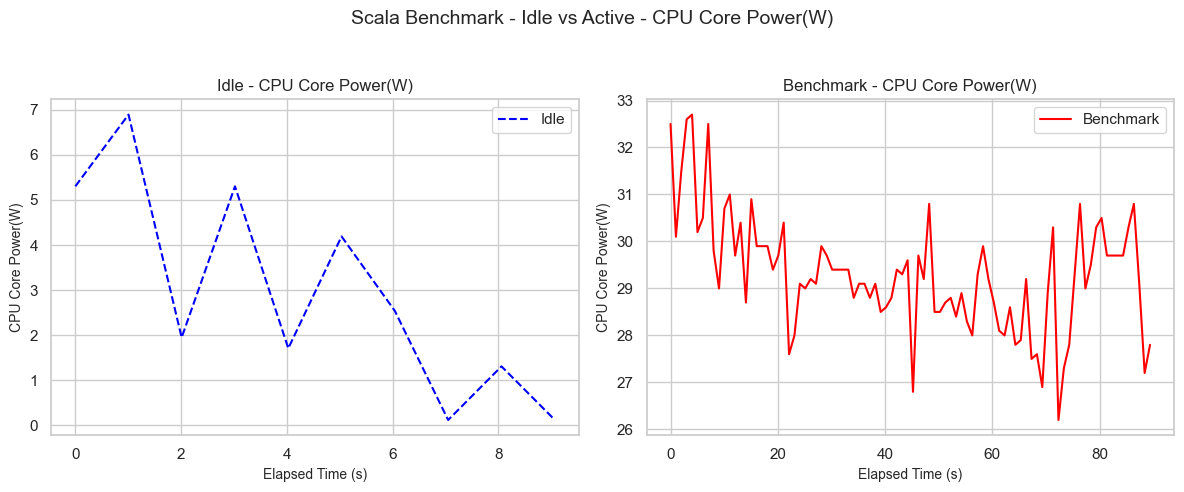

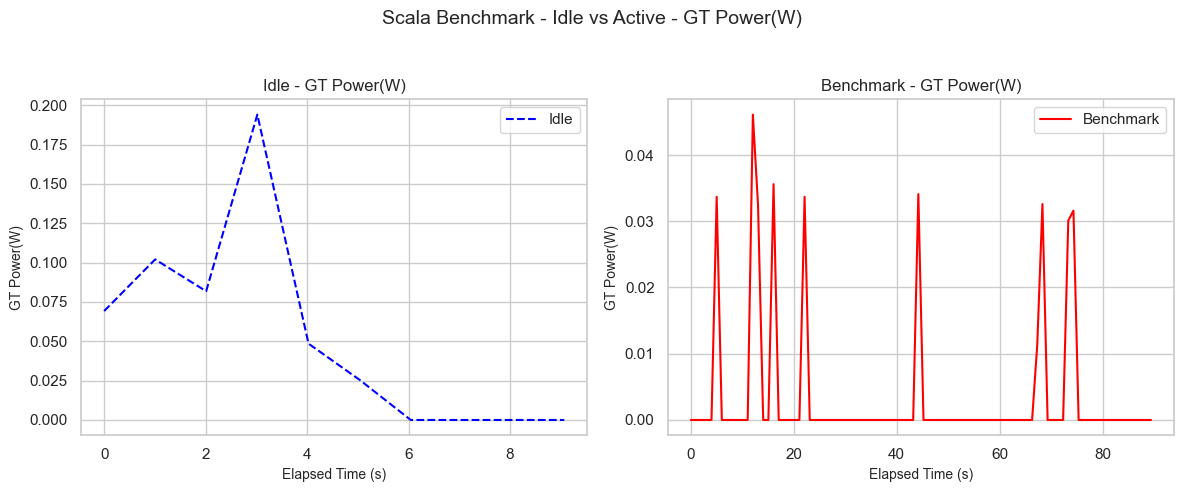

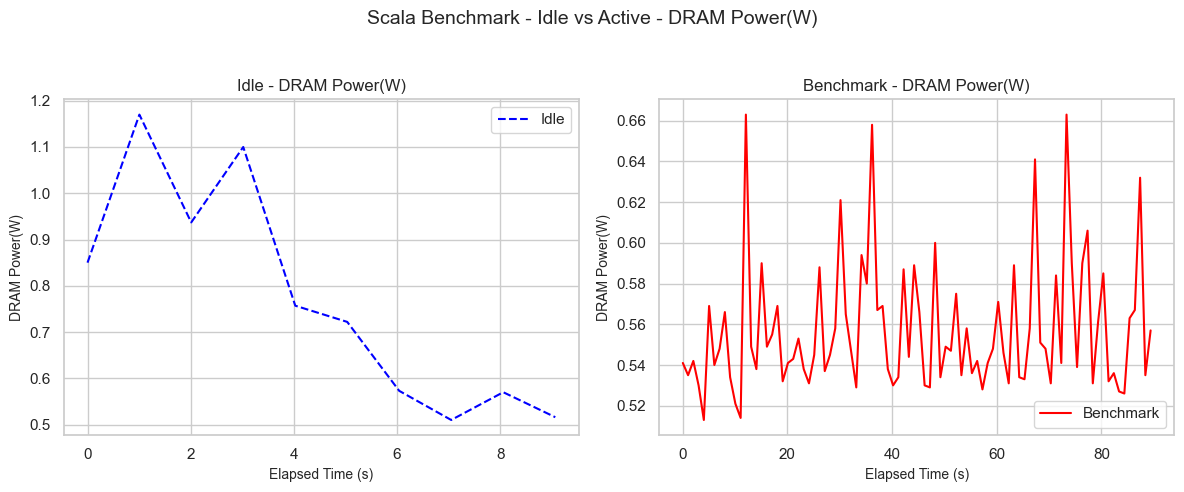

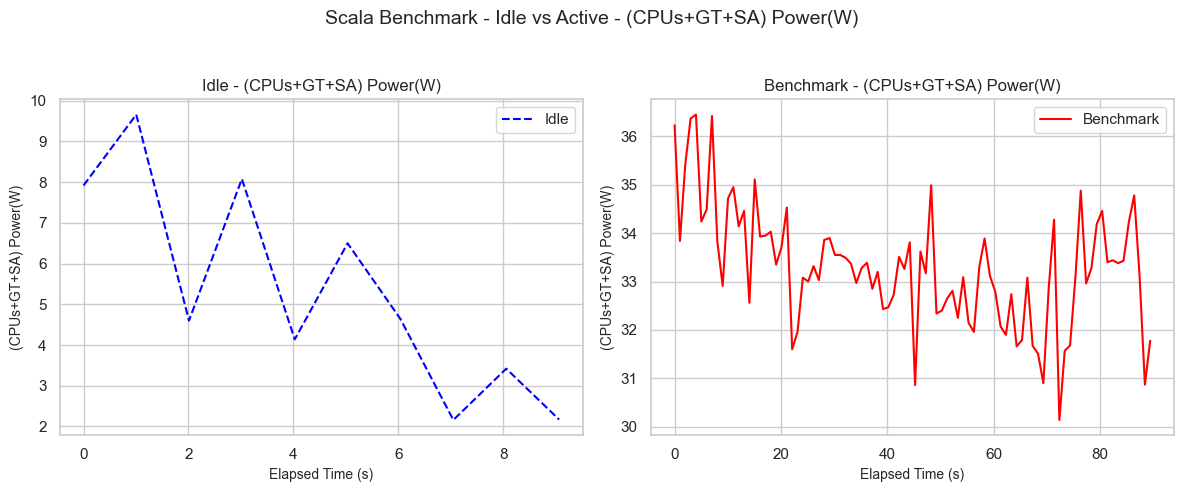

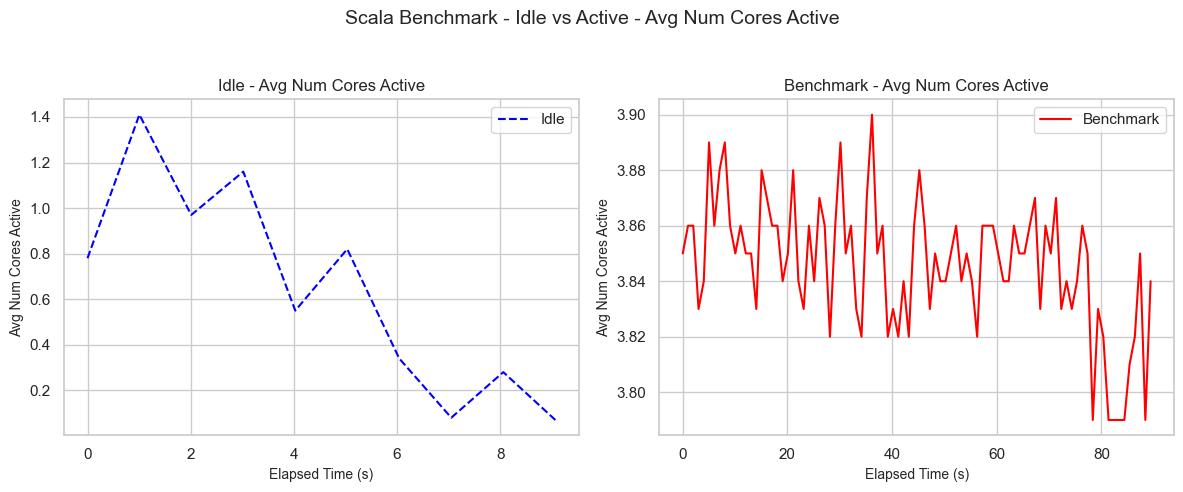

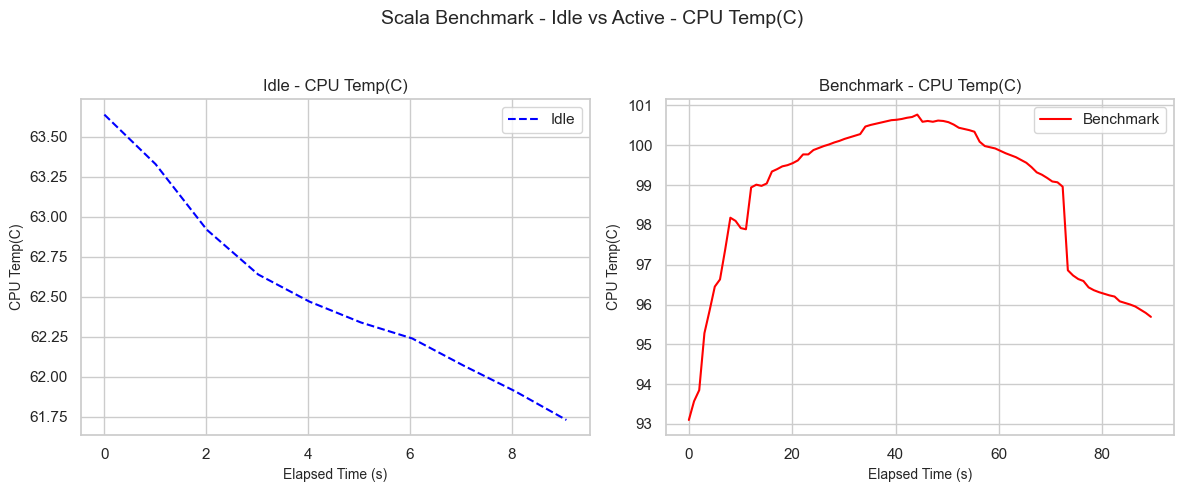

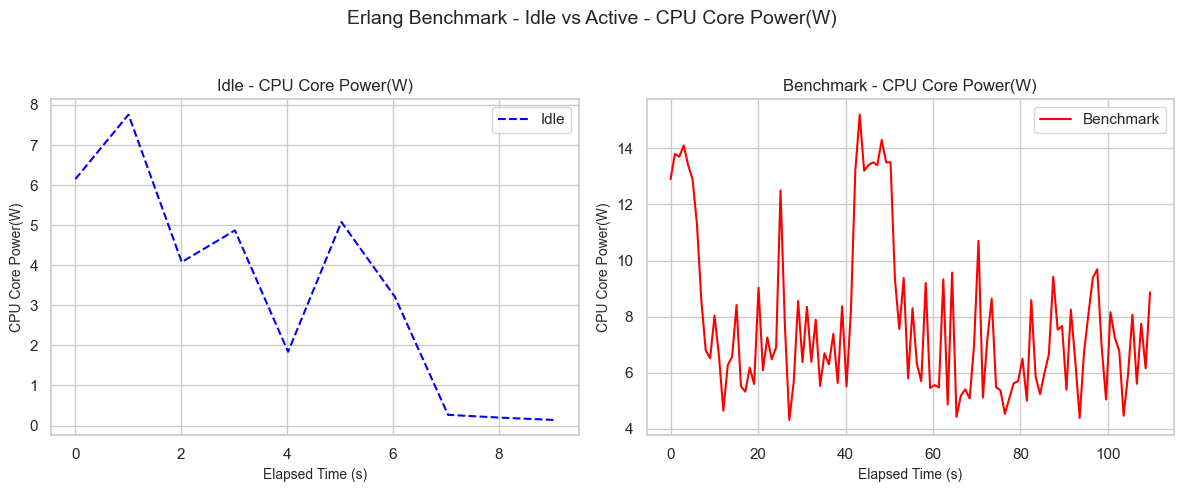

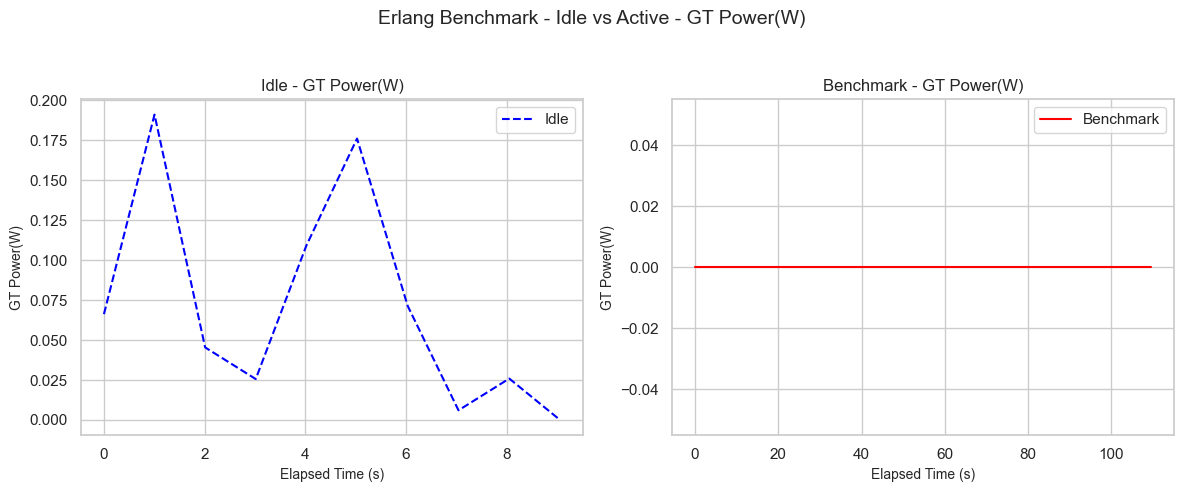

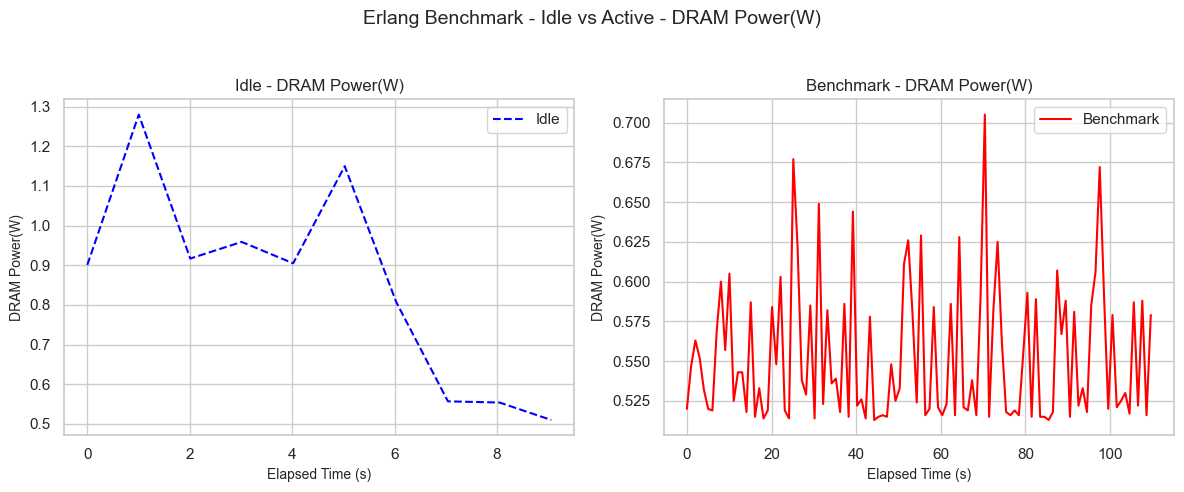

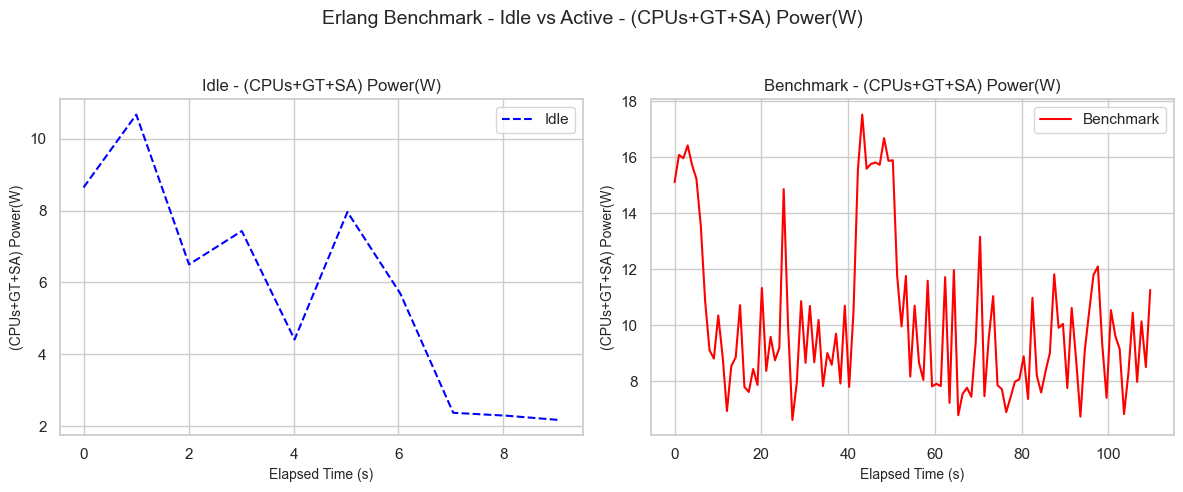

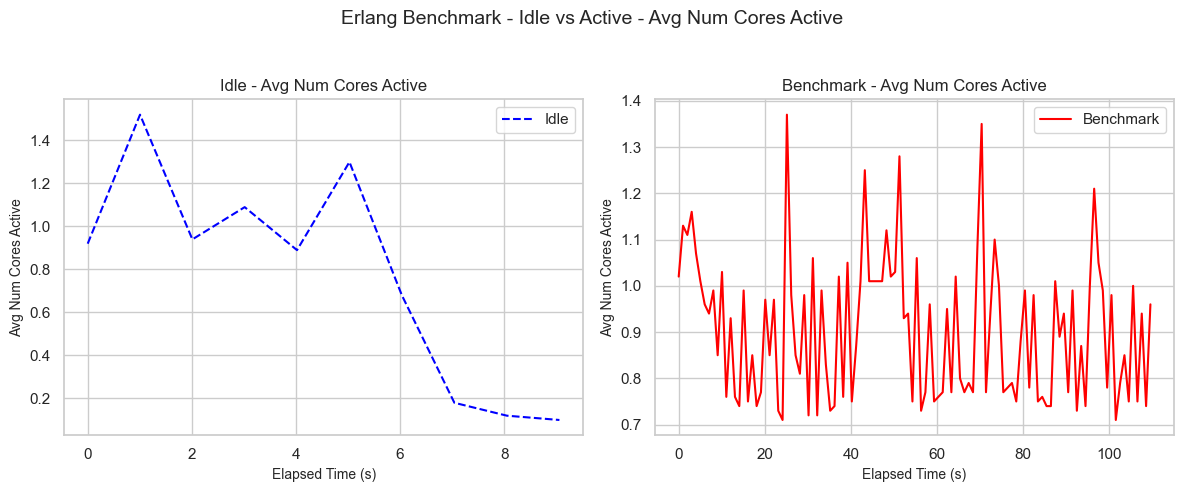

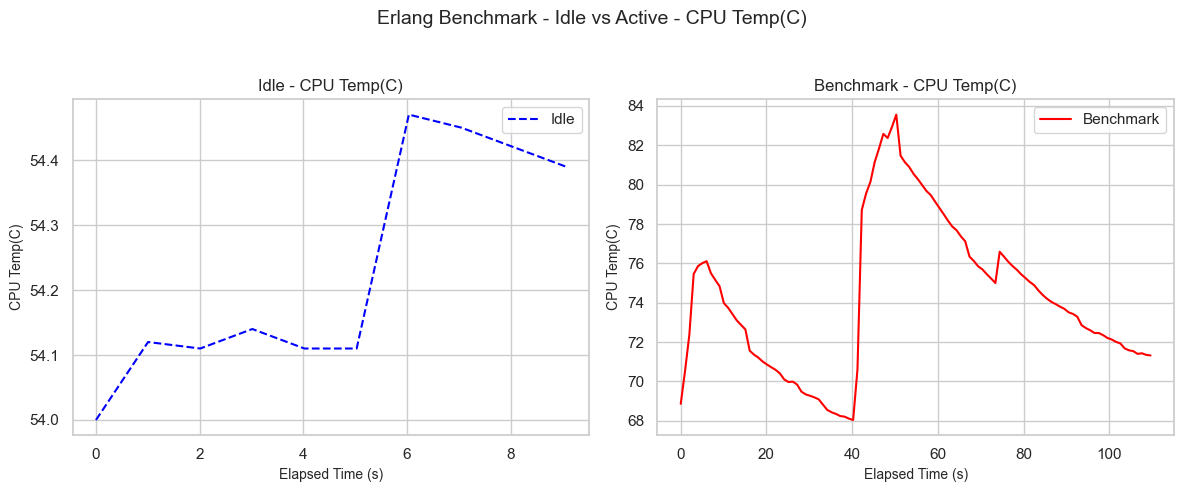

In [37]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [23]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Normalize elapsed time to start from t=0
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # erlang_df["Elapsed Time (s)"] = (erlang_df["Timestamp"] - erlang_df["Timestamp"].iloc[0]).dt.total_seconds()
    # scala_df["Elapsed Time (s)"] = (scala_df["Timestamp"] - scala_df["Timestamp"].iloc[0]).dt.total_seconds()

    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Graph formatting
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


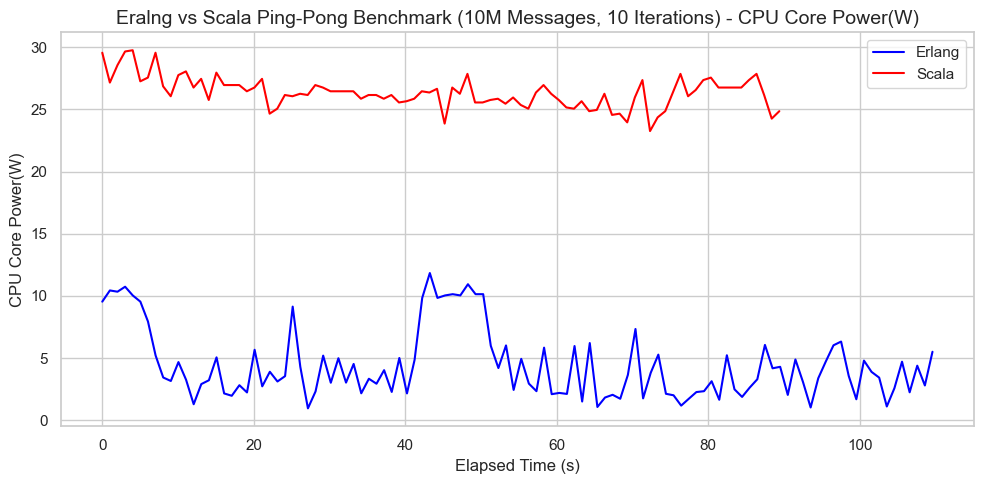

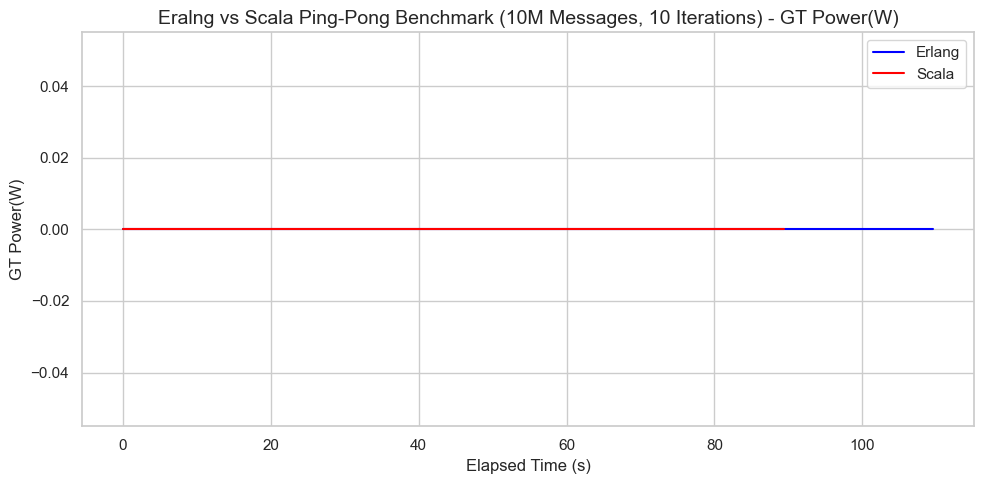

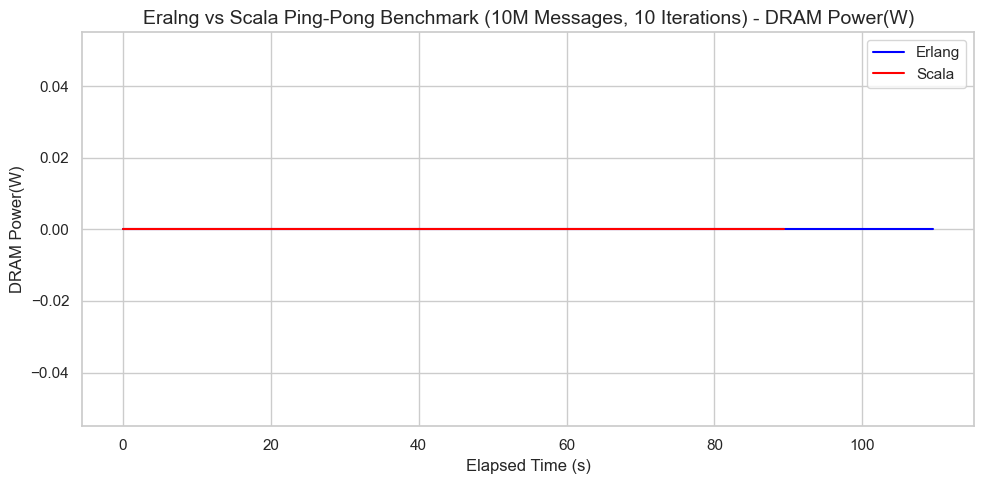

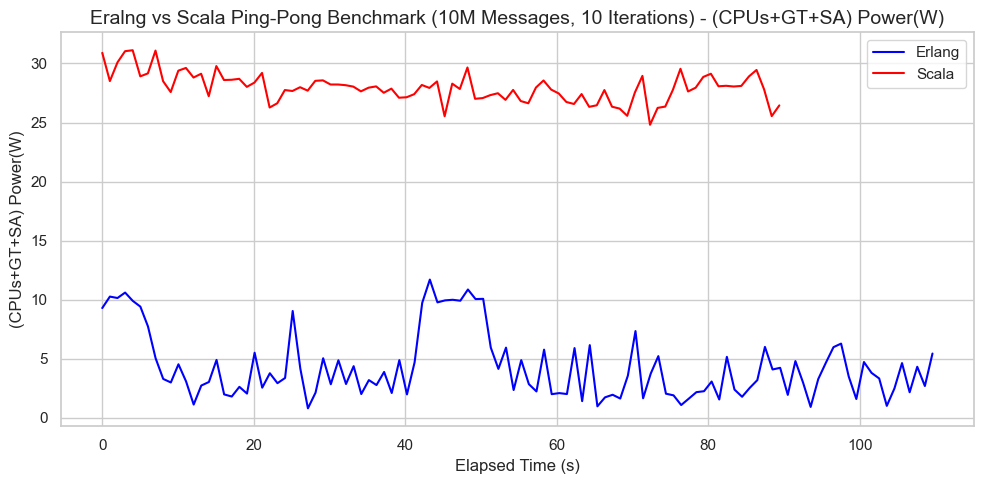

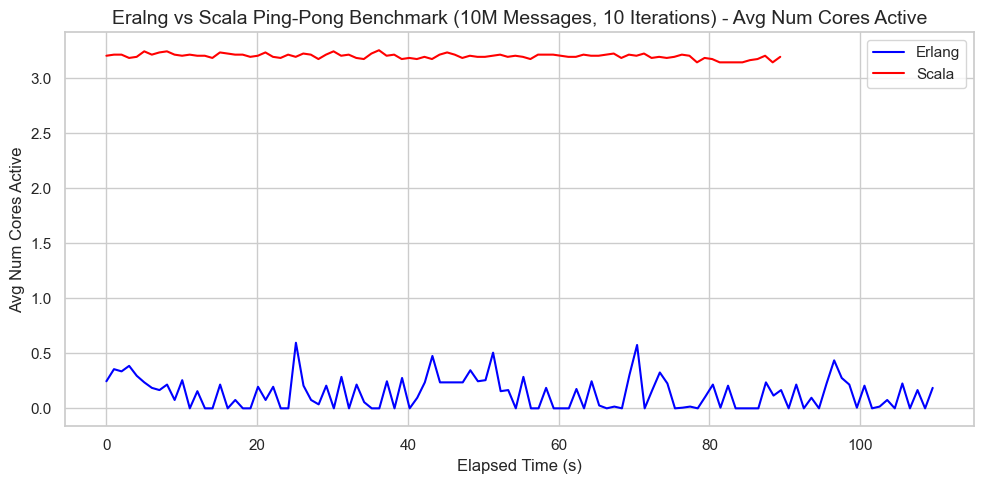

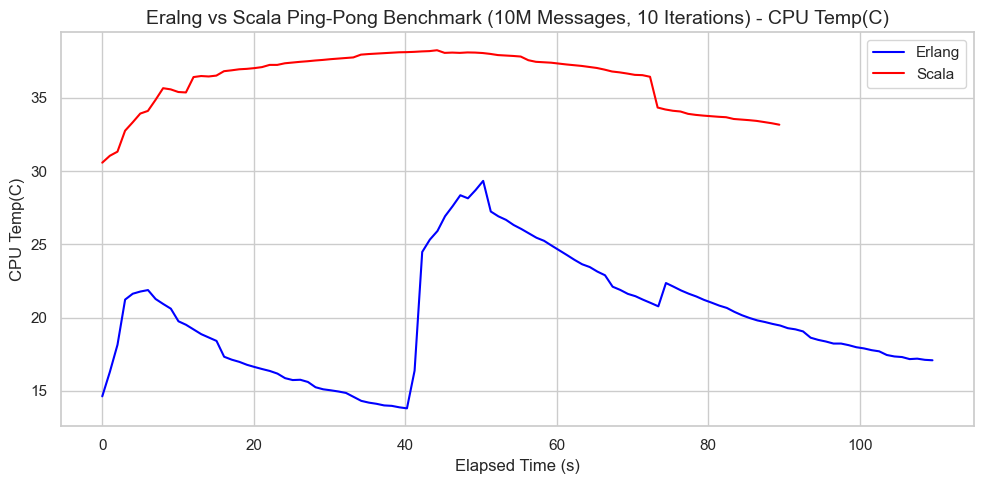

In [38]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [39]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active", "CPU Core Energy(J)", "GT Energy(J)", "DRAM Energy(J)", "(CPUs+GT+SA) Energy(J)"]

scala_idle_avgs = scala_idle_data[metrics_columns].mean()
erlang_idle_avgs = erlang_idle_data[metrics_columns].mean()
scala_bench_avgs = scala_bench_data[metrics_columns].mean()
erlang_bench_avgs = erlang_bench_data[metrics_columns].mean()

scala_net_avgs = scala_bench_avgs - scala_idle_avgs
erlang_net_avgs = erlang_bench_avgs - erlang_idle_avgs


print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)         26.362056
GT Power(W)               -0.048529
DRAM Power(W)             -0.213333
(CPUs+GT+SA) Power(W)     27.957444
CPU Temp(C)               36.232667
Avg Num Cores Active       3.199889
CPU Core Energy(J)        26.471703
GT Energy(J)              -0.048886
DRAM Energy(J)            -0.216495
(CPUs+GT+SA) Energy(J)    28.067041
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)          4.439464
GT Power(W)               -0.071645
DRAM Power(W)             -0.301127
(CPUs+GT+SA) Power(W)      4.327818
CPU Temp(C)               20.009364
Avg Num Cores Active       0.130091
CPU Core Energy(J)         4.463239
GT Energy(J)              -0.072088
DRAM Energy(J)            -0.303596
(CPUs+GT+SA) Energy(J)     4.348304
dtype: float64
